In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from torch.func import vmap, jacrev
from tqdm import tqdm
import os
import random
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks import Callback
import math
from pydmd import DMD
from sklearn.preprocessing import MinMaxScaler
import warnings
from matplotlib import cm
from scipy.interpolate import interp1d
from scipy.stats import mannwhitneyu
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams
from matplotlib.ticker import LogFormatterMathtext, NullFormatter, FixedLocator, LogLocator, ScalarFormatter, FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

arial_font = FontProperties(fname="/root/.fonts/arial.ttf")

In [19]:
means = [2.9042593408880966, 2.8793488818373136, 2.798716243267318]
stds = [0.1566672545076388, 0.15992979974494531, 0.16063912500507826]

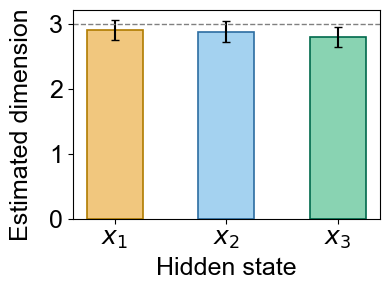

In [34]:
arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=18)

ticks = ['$x_1$', '$x_2$', '$x_3$']
x = np.arange(len(ticks))

fill_colors = ['#F1C77E', '#A4D2F0', '#89D3B2']
edge_colors = ['#B07C00', '#2C6DA1', '#00694C']

fig, ax = plt.subplots(figsize=(4, 3))

for i in range(len(ticks)):
    ax.bar(
        x[i], means[i], yerr=stds[i], capsize=3,
        color=fill_colors[i],
        edgecolor=edge_colors[i],
        linewidth=1.2,
        width=0.5
    )

ax.set_xticks(x)
plt.yticks(np.arange(0, 3.1, 1))
ax.set_xticklabels(ticks, fontsize=8, fontproperties=arial_font)
ax.set_xlabel('Hidden state', fontsize=18, fontproperties=arial_font)

ax.set_ylabel('Estimated dimension', fontsize=18, fontproperties=arial_font)
ax.yaxis.set_label_coords(-0.13, 0.45)
ax.tick_params(axis='y', labelsize=8)
for label in ax.get_yticklabels():
    label.set_fontproperties(arial_font)

ax.axhline(y=3.0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.savefig("3b.svg", format='svg', bbox_inches='tight')
plt.show()

In [2]:
flowdmd_noise = pd.read_csv('../Flowdmd/noise/noise.csv').values
flowdmd_sample = pd.read_csv('../Flowdmd/sample/sample.csv').values
edmddl_noise = pd.read_csv('../EDMD-DL/noise/KO_noise.csv').values
edmddl_sample = pd.read_csv('../EDMD-DL/sample/KO_sample.csv').values
deepk_noise = pd.read_csv('../DeepKoopman/noise/noise.csv').values
deepk_sample = pd.read_csv('../DeepKoopman/sample/sample.csv').values
knif_noise = pd.read_csv('../noise/noise.csv').values
knif_sample = pd.read_csv('../sample/sample.csv').values

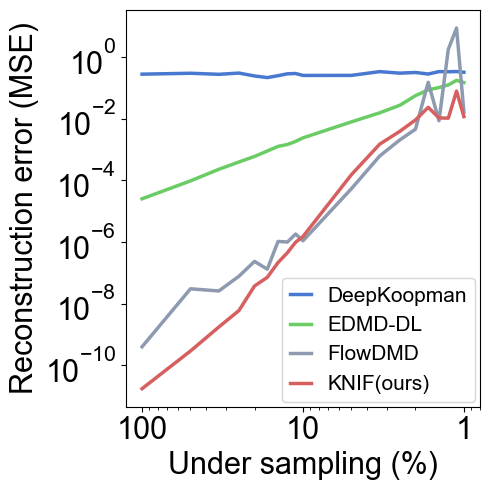

In [58]:
arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=22)
arial_font2 = FontProperties(fname="/root/.fonts/arial.ttf", size=15)

x_list = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
x_values = 100 / x_list

plt.figure(figsize=(5, 5))
plt.plot(x_values, deepk_sample, color='#4878CF', linewidth=2.5, label='DeepKoopman')
plt.plot(x_values, edmddl_sample, color='#6ACC65', linewidth=2.5, label='EDMD-DL')
plt.plot(x_values, flowdmd_sample, color='#8E9AAF', linewidth=2.5, label='FlowDMD')
plt.plot(x_values, knif_sample, color='#D65F5F', linewidth=2.5, label='KNIF(ours)')

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
ax.xaxis.set_major_formatter(ScalarFormatter())

plt.xlabel("Under sampling (%)", fontsize=22, fontproperties=arial_font)  # 图 d
# plt.xlabel("Noise strength", fontsize=12, fontproperties=arial_font)  # 图 e
plt.ylabel("Reconstruction error (MSE)", fontsize=22, fontproperties=arial_font)

plt.xticks(fontsize=8, fontproperties=arial_font)
plt.yticks(fontsize=8, fontproperties=arial_font)
plt.legend(prop=arial_font2, bbox_to_anchor=(0.41, 0.35), handlelength=1)

plt.tight_layout()
plt.savefig("3d.svg", format='svg', bbox_inches='tight')
plt.show()

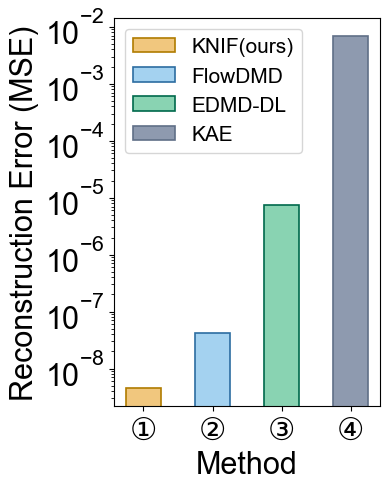

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=22)
symbol_font = FontProperties(family='DejaVu Sans', size=22)

means = [4.5481627353183285e-09, 4.1608288370298396e-08, 7.47585868356635e-06, 0.0068650683388113976]
ticks = ['①', '②', '③', '④']
x = np.arange(len(ticks))

fill_colors = ['#F1C77E', '#A4D2F0', '#89D3B2', '#8E9AAF']
edge_colors = ['#B07C00', '#2C6DA1', '#00694C', '#606F87']  # 边缘色与填充色协调
name = ['KNIF(ours)', 'FlowDMD', 'EDMD-DL', 'KAE']

fig, ax = plt.subplots(figsize=(4, 5))

for i in range(len(ticks)):
    ax.bar(
        x[i], means[i], capsize=3,
        color=fill_colors[i],
        edgecolor=edge_colors[i],
        linewidth=1.2,
        width = 0.5,
        label = name[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(ticks, fontsize=8, fontproperties=symbol_font)
ax.set_yscale('log')
ax.set_xlabel('Method', fontsize=22, fontproperties=arial_font)
ax.set_ylabel('Reconstruction error (MSE)', fontsize=22, fontproperties=arial_font)
ax.tick_params(axis='y', labelsize=8)
for label in ax.get_yticklabels():
    label.set_fontproperties(arial_font)
plt.legend(prop=arial_font2)

plt.tight_layout()
plt.savefig("3f.svg", format='svg', bbox_inches='tight')
plt.show()

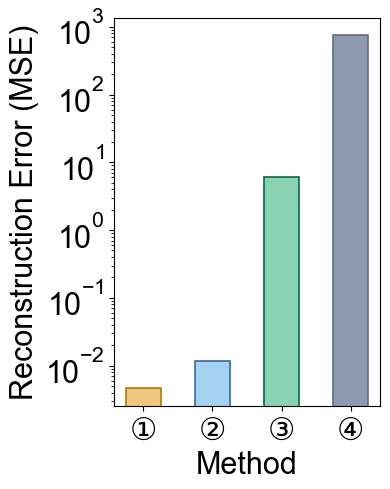

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=22)
symbol_font = FontProperties(family='DejaVu Sans', size=22)

means = [0.0046632736921310425, 0.011797617189586163, 5.97103424218585, 751.4627075195312]
ticks = ['①', '②', '③', '④']
x = np.arange(len(ticks))

fill_colors = ['#F1C77E', '#A4D2F0', '#89D3B2', '#8E9AAF']
edge_colors = ['#B07C00', '#2C6DA1', '#00694C', '#606F87']  
name = ['KNIF', 'FlowDMD', 'EDMD-DL', 'KAE']

fig, ax = plt.subplots(figsize=(4, 5))

for i in range(len(ticks)):
    ax.bar(
        x[i], means[i], capsize=3,
        color=fill_colors[i],
        edgecolor=edge_colors[i],
        linewidth=1.2,
        width = 0.5,
        label = name[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(ticks, fontsize=8, fontproperties=symbol_font)
ax.set_yscale('log')
ax.set_xlabel('Method', fontsize=22, fontproperties=arial_font)
ax.set_ylabel('Reconstruction Error (MSE)', fontsize=22, fontproperties=arial_font)
ax.tick_params(axis='y', labelsize=8)
for label in ax.get_yticklabels():
    label.set_fontproperties(arial_font)

plt.tight_layout()
plt.savefig("3g.svg", format='svg', bbox_inches='tight')
plt.show()

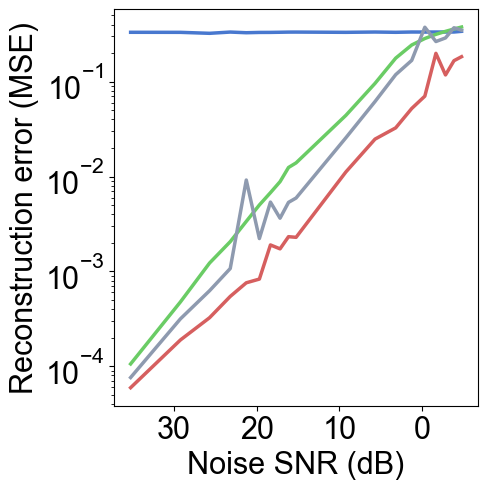

In [54]:
arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=22)

x_list = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# x_values = x_list * 0.01
x_values = 10 * np.log10(0.3340066047950946 / ((x_list * 0.01) ** 2))

plt.figure(figsize=(5, 5))
plt.plot(x_values, deepk_noise, color='#4878CF', linewidth=2.5, label='DeepKoopman')
plt.plot(x_values, edmddl_noise, color='#6ACC65', linewidth=2.5, label='EDMD-DL')
plt.plot(x_values, flowdmd_noise, color='#8E9AAF', linewidth=2.5, label='FlowDMD')
plt.plot(x_values, knif_noise, color='#D65F5F', linewidth=2.5, label='KNIF')

ax = plt.gca()
# ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1]))
ax.yaxis.set_major_formatter(LogFormatterMathtext())
ax.yaxis.set_minor_formatter(NullFormatter()) 
ax.xaxis.set_major_formatter(ScalarFormatter())

plt.xlabel("Noise SNR (dB)", fontsize=22, fontproperties=arial_font)
# plt.xlabel("Noise strength", fontsize=12, fontproperties=arial_font)  
plt.ylabel("Reconstruction error (MSE)", fontsize=22, fontproperties=arial_font)

plt.xticks(fontsize=18, fontproperties=arial_font)
plt.yticks(fontsize=18, fontproperties=arial_font)

plt.tight_layout()
plt.savefig("3e.svg", format='svg', bbox_inches='tight')
plt.show()

In [52]:
KO = pd.read_csv('KO_total.csv', header=None).values.T

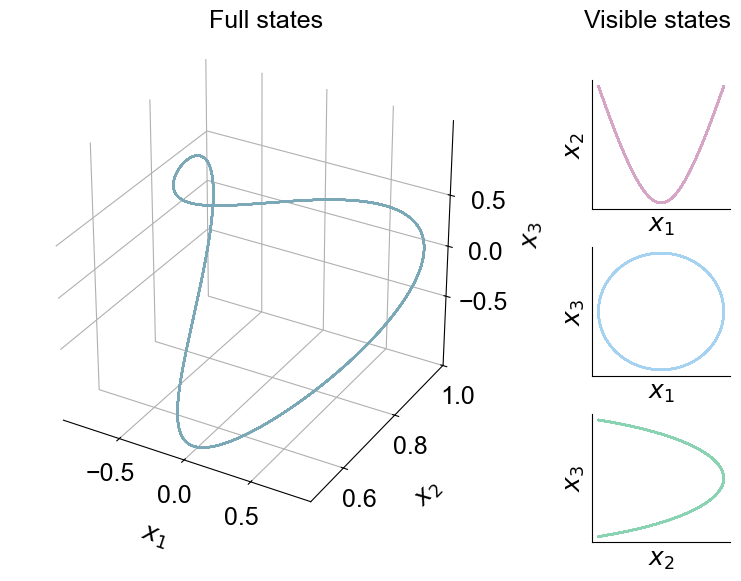

In [53]:
arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=18)

colors = ['#D6A4C4', '#A4D2F0', '#89D3B2']
labels = [('$x_1$', '$x_2$'), ('$x_1$', '$x_3$'), ('$x_2$', '$x_3$')]
pairs = [(0, 1), (0, 2), (1, 2)]

fig = plt.figure(figsize=(8, 6))
fig.text(0.32, 0.96, 'Full states', fontsize=18, fontproperties=arial_font, ha='center', va='bottom')
fig.text(0.81, 0.96, 'Visible states', fontsize=18, fontproperties=arial_font, ha='center', va='bottom')
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=1)
gs_right = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[1], hspace=0.3)
ax3d = fig.add_subplot(gs[0], projection='3d')
ax3d.plot(KO[:, 0], KO[:, 1], KO[:, 2], color='#7AA8B7', linewidth=1.5)  
ax3d.set_position([0.0, 0.1, 0.6, 0.9])

ax3d.set_box_aspect([1, 1, 1])
ax3d.set_xlabel('$x_1$', fontsize=18, fontproperties=arial_font, labelpad=15)
ax3d.set_ylabel('$x_2$', fontsize=18, fontproperties=arial_font, labelpad=15)
ax3d.set_zlabel('$x_3$', fontsize=18, fontproperties=arial_font, labelpad=20)
ax3d.set_xticks(np.linspace(-1, 1, 5)[1: -1]) 
ax3d.set_yticks(np.linspace(0.4, 1.2, 5)[1: -1])
ax3d.set_zticks(np.linspace(-1, 1, 5)[1: -1])
ax3d.set_facecolor('white')
ax3d.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d.zaxis.set_tick_params(pad=10)
for label in ax3d.get_xticklabels() + ax3d.get_yticklabels() + ax3d.get_zticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(18)

for i in range(3):
    ax = fig.add_subplot(gs_right[i])
    x_idx, y_idx = pairs[i]
    ax.plot(KO[:, x_idx], KO[:, y_idx], color=colors[i], linewidth=1.5)
    ax.set_xlabel(labels[i][0], fontsize=18, fontproperties=arial_font)
    ax.set_ylabel(labels[i][1], fontsize=18, fontproperties=arial_font)
    ax.tick_params(labelsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(arial_font)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# plt.tight_layout()
plt.savefig("3a.svg", format='svg', bbox_inches='tight')
plt.show()

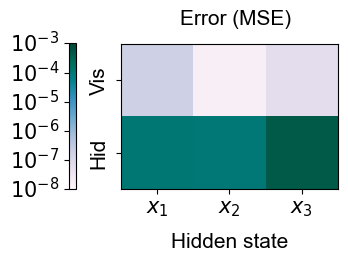

In [10]:
arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=15)

error_v_list = [1.878041331337954e-07, 1.8665826218011716e-08, 6.518475004213542e-08]
error_h_list = [0.00010664079286164683, 9.747938723404848e-05, 0.00046692985917074647]
errors = np.array([error_v_list, error_h_list])
log_errors = np.log10(errors)
vmin = np.floor(log_errors.min())
vmax = np.ceil(log_errors.max())

fig, ax = plt.subplots(figsize=(3.5, 3))
im = ax.imshow(log_errors, cmap='PuBuGn', vmin=vmin, vmax=vmax)

ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1])
ax.set_xticklabels(['$x_1$', '$x_2$', '$x_3$'], fontsize=8, fontproperties=arial_font)
ax.set_yticklabels(['Vis', 'Hid'], fontsize=8, fontproperties=arial_font, rotation=90, va='center')
ax.tick_params(axis='y', pad=5)
ax.set_xlabel('Hidden state', labelpad=10, fontsize=15, fontproperties=arial_font)

cbar = plt.colorbar(im, ax=ax, orientation='vertical', location='left')
cbar.ax.tick_params(labelsize=8)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_verticalalignment('center')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: r'$10^{%d}$' % x))

plt.tight_layout()

cb_pos = cbar.ax.get_position()
cb_xcenter = cb_pos.x0 + cb_pos.width / 2
cb_top = cb_pos.y1

new_cbar_pos = [
    cb_pos.x0 - cb_pos.width * 0.1,  
    cb_pos.y0 + cb_pos.height * 0.20,   
    cb_pos.width * 0.75,                
    cb_pos.height * 0.6               
]
cbar.ax.set_position(new_cbar_pos)

new_cb_pos = cbar.ax.get_position()
new_cb_xcenter = new_cb_pos.x0 + new_cb_pos.width / 2
new_cb_top = new_cb_pos.y1

fig.text(new_cb_xcenter + 0.5, new_cb_top + 0.05,
         'Error (MSE)',
         fontsize=15,
         fontproperties=arial_font,
         ha='center',
         va='bottom')
plt.savefig("3c.svg", format='svg', bbox_inches='tight')
plt.show()

In [46]:
error_knif = [1.878041331337954e-07, 1.8665826218011716e-08, 6.518475004213542e-08]
error_flowdmd = [0.5988031625747681, 2.64538311958313, 0.5118588209152222]
error_edmddl = [0.034491301562250755, 0.0335241345604324, 0.012469338938701694]
error_deepk = [9999999, 9999999, 9999999]

In [47]:
means = [np.mean(error_knif), np.mean(error_flowdmd), np.mean(error_edmddl), np.mean(error_deepk)]
stds = [np.std(error_knif), np.std(error_flowdmd), np.std(error_edmddl), np.std(error_deepk)]

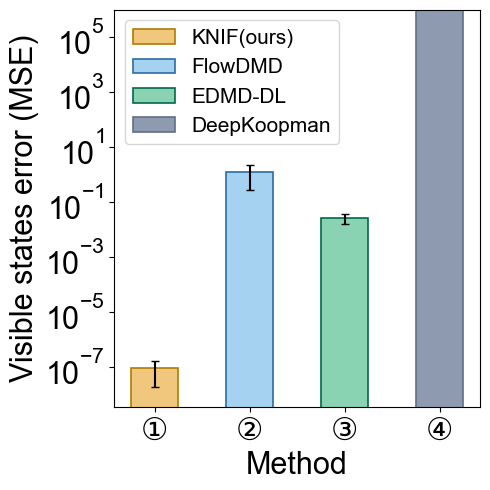

In [50]:
arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=22)
arial_font2 = FontProperties(fname="/root/.fonts/arial.ttf", size=15)
symbol_font = FontProperties(family='DejaVu Sans', size=22)

ticks = ['①', '②', '③', '④']
name = ['KNIF(ours)', 'FlowDMD', 'EDMD-DL', 'DeepKoopman']
x = np.arange(len(ticks))

fill_colors = ['#F1C77E', '#A4D2F0', '#89D3B2', '#8E9AAF']
edge_colors = ['#B07C00', '#2C6DA1', '#00694C', '#606F87']

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(len(ticks)):
    ax.bar(
        x[i], means[i], yerr=stds[i], capsize=3,
        color=fill_colors[i],
        edgecolor=edge_colors[i],
        linewidth=1.2,
        width=0.5,
        label=name[i]
    )

ax.set_xticks(x)
for label in ax.get_yticklabels():
    label.set_fontproperties(arial_font)
plt.yticks(np.arange(0, 3.1, 1))
ax.set_xticklabels(ticks, fontsize=22, fontproperties=symbol_font)
ax.set_xlabel('Method', fontsize=22, fontproperties=arial_font)
ax.set_yscale('log')
ax.set_ylim(top=1000000)
ax.set_ylabel('Visible states error (MSE)', fontsize=22, fontproperties=arial_font)
ax.tick_params(axis='y', labelsize=8)
for label in ax.get_yticklabels():
    label.set_fontproperties(arial_font)
plt.legend(prop=arial_font2)
plt.tight_layout()
plt.savefig("3f_new.svg", format='svg', bbox_inches='tight')
plt.show()